In [185]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import random
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
from sklearn import metrics
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [186]:
# from google.colab import drive
# drive.mount('/content/drive')

In [187]:
nltk.download('gutenberg')
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [188]:
#global dataFrameT
dataFrameT = pd.DataFrame()

In [189]:
def listToString(s): 
  text = " ".join(s)
  return text

In [190]:
def stringOrList(x):
  if type(x) == str:
   textDataPartitioning(x)

  elif type(x) == list:
    for i in range(len(x)):
      textDataPartitioning(x[i])

In [191]:
def stemming_text(words):
  stemmer = PorterStemmer()
  # words = text.split()
  words = [stemmer.stem(word.strip()) for word in words]
  return " ".join(words)

In [192]:
def lemm_text(words):
  lemmatizer = WordNetLemmatizer()
  # words = text.split()
  words = [lemmatizer.lemmatize(word, pos='v') for word in words]
  return " ".join(words)

In [193]:
def textDataPartitioning(x): 
 text = nltk.corpus.gutenberg.raw(x)
 stop_words = set(stopwords.words('english')) 

 text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
 text = re.sub(r'[\d_]', '', text)

 print("--- removing stop words ---")           #stop words must be removed first
 word_tokens = word_tokenize(text)
 filtered_words = [] 
 for w in word_tokens: 
     if w not in stop_words: 
         filtered_words.append(w)

 print("--- stemming ---")                       #stemming is supposed to show better performance than lemmatization but we will test both
 new_text = stemming_text(filtered_words)

#  print("--- lemmatization ---") 
#  new_text = lemm_text(filtered_words)

 filtered_sentence = (new_text.strip()).split()

 temp = []
 list_of_lists = []
 list_of_lists1 = []
 index=0

 for word in filtered_sentence:
   temp.append(word)
   if len(temp) == 150:
    list_of_lists.append(temp)
    temp=[]

 for i in range(200):
  ran = random.randint(0, len(list_of_lists)-1)
  list_of_lists1.append([listToString(list_of_lists[ran]), x])

 dataFrame = pd.DataFrame(list_of_lists1, columns=["partition", "book"])
 global dataFrameT  
 dataFrameT = dataFrameT.append(dataFrame, ignore_index = True)


In [194]:
book_list = ['bible-kjv.txt', 'milton-paradise.txt', 'chesterton-brown.txt', 'shakespeare-macbeth.txt', 'melville-moby_dick.txt']

stringOrList(book_list)
# dataFrameT.to_csv("dataset.csv", index=False)
dataFrameT

--- removing stop words ---
--- stemming ---
--- removing stop words ---
--- stemming ---
--- removing stop words ---
--- stemming ---
--- removing stop words ---
--- stemming ---
--- removing stop words ---
--- stemming ---


,partition,book
0,month children israel assembl fast sackcloth e...,bible-kjv.txt
1,either three year famin three month destroy th...,bible-kjv.txt
2,us flesh arm likewis mind hath suffer flesh ha...,bible-kjv.txt
3,salut grace lord jesu christ love god communio...,bible-kjv.txt
4,went captiv iniqu trespass therefor hid face g...,bible-kjv.txt
...,...,...
995,wonder sperm whalemen absent four year four ba...,melville-moby_dick.txt
996,new england travel mungo park scotch one men p...,melville-moby_dick.txt
997,childhood natur imbib state dramat thee thou q...,melville-moby_dick.txt
998,negro clear foul line ram bucket collaps well ...,melville-moby_dick.txt


# Import Dataset from here <---------


In [195]:
dataFrameT = pd.read_csv('dataset.csv')

In [196]:
DataFrameOrg = dataFrameT.copy()

In [197]:
dataFrameT = DataFrameOrg.copy()   #use this line to get the same data you got before 

In [198]:
dataFrameT['word_count'] = dataFrameT["partition"].apply(lambda x: len(str(x).split(" ")))
dataFrameT['char_count'] = dataFrameT["partition"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
dataFrameT['sentence_count'] = dataFrameT["partition"].apply(lambda x: len(str(x).split(".")))
dataFrameT['avg_word_length'] = dataFrameT['char_count'] / dataFrameT['word_count']
dataFrameT['avg_sentence_lenght'] = dataFrameT['word_count'] / dataFrameT['sentence_count']
dataFrameT['Author'] = dataFrameT['book'].apply(lambda x: x.split('-')[0])
dataFrameT

,partition,book,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght,Author
0,came upon david day forward samuel rose went r...,bible-kjv.txt,150,700,1,4.666667,150.0,bible
1,upon wilder consum wrought name sake pollut he...,bible-kjv.txt,150,793,1,5.286667,150.0,bible
2,say unto believeth work shall also greater wor...,bible-kjv.txt,150,705,1,4.700000,150.0,bible
3,priest priest shall valu accord abil vow shall...,bible-kjv.txt,150,741,1,4.940000,150.0,bible
4,shalt also judg hous shalt also keep court giv...,bible-kjv.txt,150,703,1,4.686667,150.0,bible
...,...,...,...,...,...,...,...,...
995,great trophi human persever latin lexicon bit ...,melville-moby_dick.txt,150,819,1,5.460000,150.0,melville
996,knee pois harpoon cri way capain see small dro...,melville-moby_dick.txt,150,718,1,4.786667,150.0,melville
997,wonder wave fix fieri lanc mightier stranger f...,melville-moby_dick.txt,150,694,1,4.626667,150.0,melville
998,born member first congreg church deacon queequ...,melville-moby_dick.txt,150,769,1,5.126667,150.0,melville


In [199]:
from textblob import TextBlob
dataFrameT["Sentiment"] = dataFrameT["partition"].apply(lambda x: 
                   TextBlob(x).sentiment.polarity)
dataFrameT

,partition,book,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght,Author,Sentiment
0,came upon david day forward samuel rose went r...,bible-kjv.txt,150,700,1,4.666667,150.0,bible,-5.571429e-01
1,upon wilder consum wrought name sake pollut he...,bible-kjv.txt,150,793,1,5.286667,150.0,bible,1.454545e-02
2,say unto believeth work shall also greater wor...,bible-kjv.txt,150,705,1,4.700000,150.0,bible,3.636364e-01
3,priest priest shall valu accord abil vow shall...,bible-kjv.txt,150,741,1,4.940000,150.0,bible,4.934325e-17
4,shalt also judg hous shalt also keep court giv...,bible-kjv.txt,150,703,1,4.686667,150.0,bible,2.902041e-01
...,...,...,...,...,...,...,...,...,...
995,great trophi human persever latin lexicon bit ...,melville-moby_dick.txt,150,819,1,5.460000,150.0,melville,2.662526e-02
996,knee pois harpoon cri way capain see small dro...,melville-moby_dick.txt,150,718,1,4.786667,150.0,melville,9.670868e-02
997,wonder wave fix fieri lanc mightier stranger f...,melville-moby_dick.txt,150,694,1,4.626667,150.0,melville,3.575000e-01
998,born member first congreg church deacon queequ...,melville-moby_dick.txt,150,769,1,5.126667,150.0,melville,2.128446e-01


In [200]:
dataFrameT.shape
dataFrameT.loc[:,['partition', 'Author']]

,partition,Author
0,came upon david day forward samuel rose went r...,bible
1,upon wilder consum wrought name sake pollut he...,bible
2,say unto believeth work shall also greater wor...,bible
3,priest priest shall valu accord abil vow shall...,bible
4,shalt also judg hous shalt also keep court giv...,bible
...,...,...
995,great trophi human persever latin lexicon bit ...,melville
996,knee pois harpoon cri way capain see small dro...,melville
997,wonder wave fix fieri lanc mightier stranger f...,melville
998,born member first congreg church deacon queequ...,melville


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


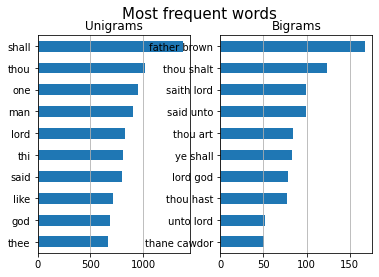

In [201]:
top=10
nltk.download('punkt')
## for vectorizer
from sklearn import feature_extraction, manifold

corpus = dataFrameT["partition"]
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle("Most frequent words", fontsize=15)
    
## unigrams
dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)
    
## bigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
dtf_bi = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
dtf_bi.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", ax=ax[1],
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)
plt.show()

Visualization:

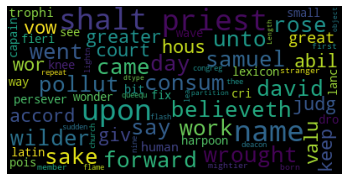

In [202]:
wc = wordcloud.WordCloud(background_color='black', max_words=100, 
                         max_font_size=35)
wc = wc.generate(str(corpus))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

In [203]:
import seaborn as sp
def plott(label,y_pred):
  clf_report = classification_report(label,
                                   y_pred,
                                   target_names=['burgess','carroll','chesterton','melville'],
                                   output_dict=True)
  print('\nConfusion Matrix:\n' )
  print(multilabel_confusion_matrix(label, y_pred))
  sp.heatmap(confusion_matrix(label, y_pred))
  plt.show()
  print('\nClassification Report:\n' )
  print(classification_report(label, y_pred))
  sp.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
  plt.show()

In [204]:
import matplotlib.pyplot as plt
def funp(y,yp):
  plt.plot(y,'x')
  plt.plot(yp, 'o')
  plt.show()

# Tokenization and Transformation

## Count Vectorization (BoW)

In [205]:
from sklearn.feature_extraction.text import CountVectorizer
count_v = CountVectorizer(max_features=2500)
X_train_counts_v = count_v.fit_transform(dataFrameT["partition"])
print(X_train_counts_v.shape)

(1000, 2500)


In [206]:
dataset_CV_bow = pd.DataFrame(X_train_counts_v.toarray(), columns = count_v.get_feature_names())
sentiment = pd.DataFrame(data = dataFrameT.loc[:,"Sentiment"], columns = ['Sentiment'])
# dataset_CV_bow = dataset_CV_bow.join(sentiment, rsuffix = '_score')
dataset_CV_bow

,aaron,abhor,abid,abl,abomin,abraham,abram,abroad,abruptli,absalom,absenc,absent,absolut,abund,accept,accompani,accord,account,accurs,accus,achiev,acquaint,across,act,actor,ad,adam,add,addit,address,admir,admit,ador,adorn,advanc,advantag,adventur,advis,affair,affeard,...,wooden,word,wore,work,world,worn,wors,worship,worst,worth,worthi,would,wouldnt,wouldst,wound,wrack,wrath,wretch,wrinkl,write,written,wrong,wrote,wrought,yard,ye,yea,year,yellow,yesterday,yet,yield,yonder,yong,youll,young,youth,youv,ysey,zion
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,2,0,2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0


# TFIDF Vectorization

In [207]:
from sklearn.feature_extraction.text import TfidfVectorizer 
tfidf_vectorizer = TfidfVectorizer(use_idf=True, max_features=2500)          # we will use the TFIDF vectorizer without n-grmas dataset as input as a third test
X_train_tfidf = tfidf_vectorizer.fit_transform(dataFrameT["partition"])
X_train_tfidf.shape

(1000, 2500)

In [208]:
dataset_tfidfV = pd.DataFrame(X_train_tfidf.toarray(), columns = tfidf_vectorizer.get_feature_names())
# dataset_tfidfV = dataset_tfidfV.join(sentiment, rsuffix = '_score')
dataset_tfidfV

,aaron,abhor,abid,abl,abomin,abraham,abram,abroad,abruptli,absalom,absenc,absent,absolut,abund,accept,accompani,accord,account,accurs,accus,achiev,acquaint,across,act,actor,ad,adam,add,addit,address,admir,admit,ador,adorn,advanc,advantag,adventur,advis,affair,affeard,...,wooden,word,wore,work,world,worn,wors,worship,worst,worth,worthi,would,wouldnt,wouldst,wound,wrack,wrath,wretch,wrinkl,write,written,wrong,wrote,wrought,yard,ye,yea,year,yellow,yesterday,yet,yield,yonder,yong,youll,young,youth,youv,ysey,zion
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.076619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.105475,0.0,0.060356,0.0,0.000000,0.0,0.0,0.024696,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.072955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.077084,0.0,0.087283,0.174565,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.330773,0.0,0.000000,0.0,0.0,0.060153,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.168917,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.109558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.115547,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.043810,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.041776,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.104904,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.199276,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.041120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.067140,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
996,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.06742,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078256,0.0,0.0,0.0,0.000000,0.0,0.128908,0.0,0.000000,0.0,0.0,0.035164,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
997,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.100809,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.

# Word Embeddings

In [209]:
import gensim.downloader as gensim_api
import gensim
from gensim.models import Word2Vec

dataframe_we = pd.DataFrame()
dataframe_we['partition'] = dataFrameT['partition']

untokenized_data = dataframe_we['partition'].tolist()
tokenized_data = []
for doc in untokenized_data:
  tokenized_data.append(doc.split())

word_model = Word2Vec(tokenized_data, min_count = 1, seed = 123)

In [210]:
print(word_model)

Word2Vec(vocab=12939, size=100, alpha=0.025)


In [211]:
def vectorize(list_of_docs, model):
    """Generate vectors for list of documents using a Word Embedding

    Args:
        list_of_docs: List of documents
        model: Gensim's Word Embedding

    Returns:
        List of document vectors
    """
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features

In [212]:
vectorized_docs = vectorize(tokenized_data, model=word_model)
len(vectorized_docs), len(vectorized_docs[0])
# vectorized_docs
dataframe_we = pd.DataFrame(data = vectorized_docs)
dataframe_we

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,-0.734771,-0.508860,0.431700,0.396328,-1.010433,0.237672,-0.139800,-0.551861,-0.747658,-0.014134,0.199846,0.202710,0.267763,0.329558,-0.375842,0.302804,0.384978,0.085640,0.021905,0.204381,0.898120,-0.486226,0.372981,-0.019427,-0.146078,-0.371976,-0.352479,-0.367056,0.503265,-0.721922,-0.341091,0.131648,-0.536215,-0.093385,-0.007395,-0.231431,-0.589129,0.398159,-0.301334,0.194262,...,0.395239,0.030914,0.257110,-0.176290,0.300942,-0.272665,0.068293,0.461916,-0.383775,0.370452,-0.504583,0.076176,-0.169945,-0.169328,-0.248380,0.311642,-0.027622,0.171244,-0.180842,0.442164,0.125195,0.300324,0.380927,-0.597202,0.154510,-0.086004,-0.328605,0.708220,0.206902,-0.228661,0.026559,0.624999,0.321130,0.572006,0.526088,-0.184117,-0.037614,0.372044,-0.317453,-0.006073
1,-0.670963,-0.466522,0.389421,0.365365,-0.931746,0.213831,-0.129507,-0.507010,-0.688137,-0.011538,0.183593,0.190430,0.248811,0.299921,-0.342773,0.278438,0.354421,0.078562,0.018829,0.187510,0.824560,-0.446677,0.344670,-0.019000,-0.132150,-0.344873,-0.321382,-0.339397,0.464044,-0.661472,-0.312395,0.120074,-0.492263,-0.083646,-0.002826,-0.208144,-0.540060,0.363399,-0.278378,0.188097,...,0.362212,0.027956,0.234911,-0.167144,0.273526,-0.247209,0.062598,0.423637,-0.351716,0.339908,-0.463927,0.069140,-0.154629,-0.154366,-0.226552,0.282231,-0.022463,0.156443,-0.164091,0.407044,0.114664,0.274479,0.347133,-0.547993,0.145298,-0.080683,-0.301591,0.647228,0.190870,-0.208654,0.022676,0.575052,0.301456,0.530372,0.487922,-0.171975,-0.036524,0.345282,-0.290570,-0.002873
2,-0.872751,-0.596267,0.501053,0.466733,-1.207094,0.282165,-0.172172,-0.651294,-0.886856,-0.010590,0.239340,0.244405,0.314657,0.392740,-0.437230,0.360646,0.462594,0.098940,0.027952,0.238182,1.068081,-0.575895,0.450466,-0.024272,-0.167950,-0.440727,-0.421266,-0.440214,0.600156,-0.852549,-0.411003,0.160355,-0.638503,-0.109536,0.001107,-0.268774,-0.709611,0.471846,-0.364170,0.240921,...,0.473063,0.030115,0.297856,-0.216781,0.355217,-0.322908,0.076700,0.549190,-0.458531,0.439870,-0.596711,0.090882,-0.211413,-0.195205,-0.296422,0.364306,-0.030244,0.205254,-0.211869,0.530961,0.144296,0.357039,0.455856,-0.708595,0.185357,-0.100661,-0.391884,0.840759,0.246410,-0.271838,0.036181,0.730041,0.379854,0.688275,0.628980,-0.227075,-0.052919,0.447017,-0.378954,-0.006985
3,-0.722839,-0.493731,0.416791,0.390169,-0.993865,0.231122,-0.136613,-0.540011,-0.733255,-0.013535,0.198747,0.200218,0.264953,0.325934,-0.366174,0.298638,0.378294,0.078234,0.024068,0.199129,0.884926,-0.475340,0.368660,-0.019102,-0.143588,-0.368084,-0.351830,-0.363134,0.497271,-0.708266,-0.336728,0.129400,-0.530785,-0.091727,-0.002871,-0.226187,-0.581238,0.388148,-0.295587,0.194987,...,0.390086,0.028609,0.250283,-0.176319,0.295491,-0.266802,0.063725,0.452374,-0.380108,0.358282,-0.499173,0.076121,-0.169563,-0.163062,-0.246132,0.307018,-0.023137,0.165478,-0.175102,0.436766,0.116278,0.293116,0.371702,-0.585712,0.156490,-0.081571,-0.322113,0.696082,0.200344,-0.223294,0.027591,0.607364,0.311868,0.564828,0.515887,-0.186079,-0.039413,0.364127,-0.309427,-0.001722
4,-0.821250,-0.566037,0.483265,0.444916,-1.126467,0.267382,-0.156146,-0.618366,-0.836010,-0.016469,0.224627,0.223538,0.299279,0.368468,-0.420178,0.337553,0.429207,0.096015,0.023480,0.229438,1.003831,-0.541858,0.418389,-0.022372,-0.163792,-0.415014,-0.396534,-0.410594,0.561391,-0.803225,-0.378071,0.144158,-0.600796,-0.103721,-0.008631,-0.258857,-0.659777,0.445244,-0.334024,0.215571,...,0.437895,0.034116,0.288644,-0.195544,0.336197,-0.302943,0.075562,0.516400,-0.432010,0.412734,-0.565121,0.086261,-0.189305,-0.191082,-0.280271,0.347963,-0.030458,0.188011,-0.201039,0.495932,0.139725,0.335938,0.424100,-0.667677,0.176355,-0.094874,-0.364365,0.792345,0.230354,-0.255526,0.029699,0.696503,0.356313,0.637701

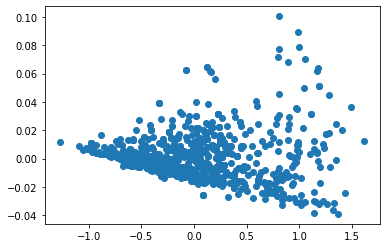

In [213]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

# X = word_model[word_model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(dataframe_we)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(word_model.wv.vocab)
# for i, word in enumerate(words):
# 	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

# Doc2Vec

In [214]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(tokenized_data)]

In [215]:
## Train doc2vec model
doc2vec_model = Doc2Vec(tagged_data, vector_size=20, window=2, min_count=1, workers=4, epochs = 100)

# doc2vec_model.wv.vocab

In [216]:
test_doc = tokenized_data[1]
doc2vec_model.docvecs.most_similar(positive=[doc2vec_model.infer_vector(test_doc)],topn=5)

[(1, 0.9982849359512329),
 (140, 0.8954935073852539),
 (5, 0.8946412205696106),
 (32, 0.8913670778274536),
 (16, 0.887702226638794)]

In [217]:
from scipy import spatial
vec1 = doc2vec_model.infer_vector(tokenized_data[0])
vec2 = doc2vec_model.infer_vector(tokenized_data[300])

cos_distance = spatial.distance.cosine(vec1, vec2)
print("cosine distance: ", cos_distance)

dict_dist = {}
list_row = []

# for i in range(len(tokenized_data)):
#   for j in range(len(tokenized_data)):
#     vec1 = doc2vec_model.infer_vector(tokenized_data[i])
#     vec2 = doc2vec_model.infer_vector(tokenized_data[j])
#     list_row.append(spatial.distance.cosine(vec1, vec2))
#   dict_dist[i] = list_row
#   list_row = []

# dataframe_doc2vec = pd.DataFrame(data = dict_dist)

cosine distance:  0.7597179561853409


# LDA

In [218]:
# !pip install pyLDAvis

In [219]:
# !pip install pandas==1.2.0

In [220]:
import gensim
from gensim import corpora
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim.models.coherencemodel import CoherenceModel

dataframe_lda = pd.DataFrame()
dataframe_lda['partition'] = dataFrameT['partition']

untokenized_data = dataframe_lda['partition'].tolist()
tokenized_data = []
for doc in untokenized_data:
  tokenized_data.append(doc.split())

print(len(tokenized_data))
dictionary = corpora.Dictionary(tokenized_data)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_data]

ModuleNotFoundError: ignored

In [221]:
def compute_coherence_preplexity_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, alpha = 0.5)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        

    return model_list, coherence_values

In [223]:
import warnings
warnings.filterwarnings('ignore')
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokenized_data, start=2, limit=50, step=1)

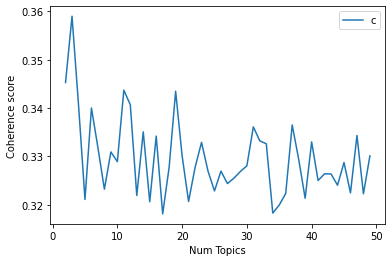


Highest Coherence is at num topics:  3


In [224]:
# Show graph
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

print("\nHighest Coherence is at num topics: ", x[coherence_values.index(max(coherence_values))])

In [225]:
# the optimal model is at 2 topics
optimal_model = model_list[x[coherence_values.index(max(coherence_values))] - 2]
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model, doc_term_matrix, dictionary)
vis

NameError: ignored

# Shuffling data

### count vectorizer (BoW)

In [ ]:
# first we join the author column
author = dataFrameT["Author"]
dataset_CV_bow = dataset_CV_bow.join(author, rsuffix = "_")

# then we shuffle the data
dataset_CV_bow = dataset_CV_bow.sample(frac = 1)

# then we split the input and the target
dataset_CV_bow_target = dataset_CV_bow['Author']
dataset_CV_bow_input = dataset_CV_bow.drop(columns = ['Author'])

# dataset_countV_target

### TFIDF

In [ ]:
# first we join the author column
dataset_tfidfV = dataset_tfidfV.join(author, rsuffix = "_")

# then we shuffle the data
dataset_tfidfV = dataset_tfidfV.sample(frac = 1)

# then we split the input and the target
dataset_tfidfV_target = dataset_tfidfV['Author']
dataset_tfidfV_input = dataset_tfidfV.drop(columns = ['Author'])

# dataset_tfidfV_input

In [ ]:
dataset_tfidfV.to_csv("tfidf_data.csv", index=False)
dataset_CV_bow.to_csv("bow_data.csv", index=False)

# Run from this point <<<------


In [ ]:
dataset_tfidfV = pd.read_csv("tfidf_data.csv")
dataset_CV_bow = pd.read_csv("bow_data.csv")

dataset_tfidfV_target = dataset_tfidfV['Author']
dataset_tfidfV_input = dataset_tfidfV.drop(columns = ['Author'])
dataset_tfidfV_input = dataset_tfidfV_input.iloc[:,1:]

dataset_CV_bow_target = dataset_CV_bow['Author']
dataset_CV_bow_input = dataset_CV_bow.drop(columns = ['Author'])
dataset_CV_bow_input = dataset_CV_bow_input.iloc[:,1:]

In [ ]:
dataset_CV_bow_input

In [ ]:
>>> from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset_tfidfV_input = scaler.fit_transform(dataset_tfidfV_input)
dataset_CV_bow_input = scaler.fit_transform(dataset_CV_bow_input)


# splitting the data

# ----> No splitting use the original datasets <-----

# K-means

In [226]:
silhouette_scores = []
kappa_scores = []
model_names = []

In [227]:
from collections import Counter
import operator

def get_real_labels(predicted_labels, real_labels, no_clusters):
  # get unique predicted_labels
  unique_list_predicted = list(range(no_clusters))  
  #   # traverse for all elements
  # for x in predicted_labels:
  #     # check if exists in unique_list or not
  #     if x not in unique_list_predicted:
  #         unique_list_predicted.append(x)
  
  # get unique real_labels
  unique_list_real = []  
    # traverse for all elements
  for x in real_labels:
      # check if exists in unique_list or not
      if x not in unique_list_real:
          unique_list_real.append(x)
  
  dict_output = {}

  for j in unique_list_real:
    dict_output[j] = []
    for i in range(len(predicted_labels)):
      if real_labels[i] == j:
        dict_output[j].append(predicted_labels[i])

# not the dictionary has all classes with predicted clusters

  dict_counter = {}

  for j in unique_list_real:
    dict_counter[j] = {}
    for i in range(no_clusters):
      dict_counter[j][i] = 0
      for l in range(len(dict_output[j])):
        if list(dict_output[j])[l] == i:
          dict_counter[j][i] = dict_counter[j][i] + 1

  dict_label_cluster = {}


  for j in unique_list_real:
    sorted_count = dict_counter[j]     #Counter(dict_output[j])   #key: cluster no, value: count
    sorted_count = dict(sorted(sorted_count.items(), key=operator.itemgetter(1), reverse=True))
    # print(sorted_count)
    for i in range(len(list(sorted_count.keys()))):
      # print(list(dict_label_cluster.keys()))
      # print(list(sorted_count.keys()))
      if list(sorted_count.keys())[i] in list(dict_label_cluster.values()):
        # print('yes')
        pass
      elif list(sorted_count.keys())[i] not in list(dict_label_cluster.values()):
        # print('no')
        dict_label_cluster[j] = list(sorted_count.keys())[i]
        break
      else:
        for k in unique_list_predicted:
          if k not in list(dict_label_cluster.values()):
            # print('here')
            dict_label_cluster[j] = k
            break
        break


  return dict_label_cluster

In [228]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics.cluster import homogeneity_score,completeness_score,adjusted_rand_score,adjusted_mutual_info_score
#from sklearn.metrics.cluster import 
from sklearn.metrics import silhouette_samples, silhouette_score,v_measure_score,cohen_kappa_score
from scipy import stats

In [229]:
import seaborn as sp
def plott(label,y_pred):
  clf_report = classification_report(label,
                                   y_pred,
                                   target_names=['bible-kjv.txt', 'milton-paradise.txt', 'chesterton-brown.txt', 'shakespeare-macbeth.txt', 'melville-moby_dick.txt'],
                                   output_dict=True)
  print('\nConfusion Matrix:\n' )
  print(multilabel_confusion_matrix(label, y_pred))
  sp.heatmap(confusion_matrix(label, y_pred))
  plt.show()
  print('\nClassification Report:\n' )
  print(classification_report(label, y_pred))
  sp.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
  plt.show()

In [230]:
def metrics(dataset, labels, clusters):
  print("cohen_kappa score: ",cohen_kappa_score(labels, clusters))
  print("homogeneity score: ", homogeneity_score(labels, clusters))
  # print("completeness score: ", completeness_score(labels, clusters))
  # print("v_measure score: ", v_measure_score(labels, clusters))
  # print("adjusted_rand_score: ", adjusted_rand_score(labels, clusters))
  # print("adjusted_mutual_info score: ", adjusted_mutual_info_score(labels,  clusters))
  # print("cohen_kappa linear score: ", cohen_kappa_score(labels, clusters,weights='linear'))
  # print("spearman: ", stats.spearmanr(labels,clusters))
  print("Silhouette score: ", silhouette_score(dataset, clusters))

  return cohen_kappa_score(labels, clusters), silhouette_score(dataset, clusters)

In [231]:
from sklearn import preprocessing
def col(y_train_tfidfV):
  label_ytrain = y_train_tfidfV
  le = preprocessing.LabelEncoder()
  le.fit(label_ytrain)
  label_ytrain = le.transform(label_ytrain)
  return label_ytrain

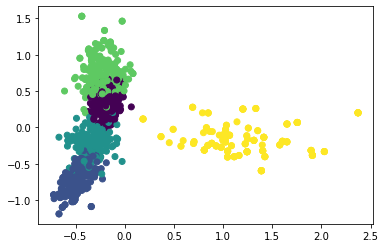

In [232]:
reduced_data = PCA(2).fit_transform(dataset_tfidfV_input)
label_ytrain = col(dataset_tfidfV_target)
plt.scatter(reduced_data[:,0], reduced_data[:,1], c= label_ytrain)
plt.show()

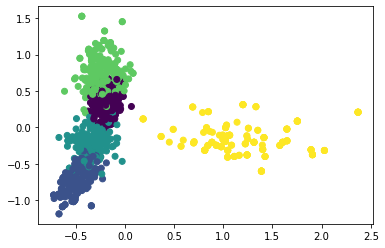

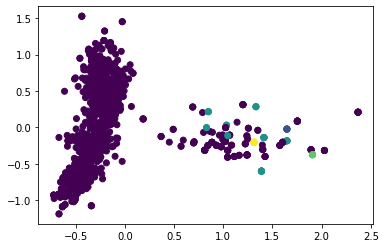

In [233]:
#cohen_kappa_score(pred_y, y_test_cv)
kmeans = KMeans(n_clusters=5, init='k-means++').fit(dataset_tfidfV_input)
pred_y = kmeans.fit_predict(dataset_tfidfV_input)
reduced_data = PCA(2).fit_transform(dataset_tfidfV_input)



label_ytrain_tfidf = col(pred_y)
label_ytrain1_tfidf = col(dataset_tfidfV_target)


plt.scatter(reduced_data[:,0], reduced_data[:,1], c= label_ytrain1_tfidf)
plt.show()
plt.scatter(reduced_data[:,0], reduced_data[:,1], c= label_ytrain_tfidf)
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

# # t-SNE plot
# embeddings = TSNE(2).fit_transform(dataset_tfidfV_input)
# plt.scatter(embeddings[:,0], embeddings[:,1], c= label_ytrain1_tfidf)
# plt.show()
# plt.scatter(embeddings[:,0], embeddings[:,1], c= label_ytrain_tfidf)
# plt.show()


In [234]:
dictionary = get_real_labels(label_ytrain_tfidf, dataset_tfidfV_target, 5)
print(dictionary)
numArray = []
for item in dataset_tfidfV_target:
    numArray.append(dictionary.get(item))

metrics(dataset_tfidfV_input, label_ytrain_tfidf, numArray)
silhouette_scores.append(metrics(dataset_tfidfV_input, label_ytrain_tfidf, numArray)[1])
kappa_scores.append(metrics(dataset_tfidfV_input, label_ytrain_tfidf, numArray)[0])
model_names.append('K-means with TFIDF and k = 5')
# plott(label_ytrain1,label_ytrain)

{'milton': 0, 'bible': 1, 'chesterton': 2, 'shakespeare': 3, 'melville': 4}
cohen_kappa score:  0.008750000000000036
homogeneity score:  0.3431035351089878
Silhouette score:  -0.0434928583877836
cohen_kappa score:  0.008750000000000036
homogeneity score:  0.3431035351089878
Silhouette score:  -0.0434928583877836
cohen_kappa score:  0.008750000000000036
homogeneity score:  0.3431035351089878
Silhouette score:  -0.0434928583877836


# Using PCA before clustering

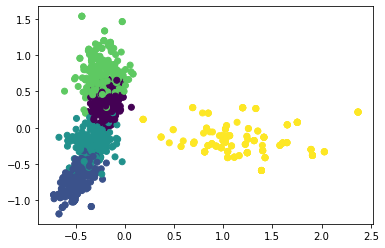

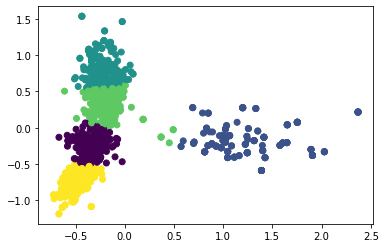

In [235]:
trainn = PCA(2).fit_transform(dataset_tfidfV_input)
kmeans_w = KMeans(n_clusters=5, init='k-means++').fit(trainn)
XX=PCA(2).fit_transform(dataset_tfidfV_input)
predictt=kmeans_w.fit_predict(XX)


label_ytrain_tfidf2 = col(predictt)
label_ytrain1_tfidf2 = col(dataset_tfidfV_target)


plt.scatter(XX[:,0], XX[:,1], c= label_ytrain1_tfidf2)
plt.show()
plt.scatter(XX[:,0], XX[:,1], c= label_ytrain_tfidf2)
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [236]:
dictionary2 = get_real_labels(label_ytrain_tfidf2, dataset_tfidfV_target, 5)
print(dictionary2)
numArray2 = []
for item in dataset_tfidfV_target:
    numArray2.append(dictionary2.get(item))


metrics(dataset_tfidfV_input, label_ytrain_tfidf2, numArray2)
silhouette_scores.append(metrics(dataset_tfidfV_input, label_ytrain_tfidf2, numArray2)[1])
kappa_scores.append(metrics(dataset_tfidfV_input, label_ytrain_tfidf2, numArray2)[0])
model_names.append('K-means with TFIDF and k = 5 and PCA')
# plott(label_ytrain1,label_ytrain)

{'milton': 2, 'bible': 3, 'chesterton': 4, 'shakespeare': 1, 'melville': 0}
cohen_kappa score:  0.86875
homogeneity score:  0.7840383994132789
Silhouette score:  -0.0434928583877836
cohen_kappa score:  0.86875
homogeneity score:  0.7840383994132789
Silhouette score:  -0.0434928583877836
cohen_kappa score:  0.86875
homogeneity score:  0.7840383994132789
Silhouette score:  -0.0434928583877836


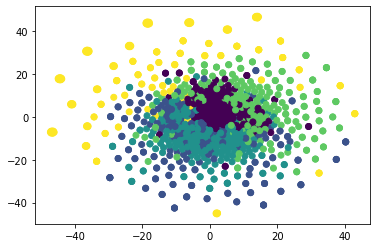

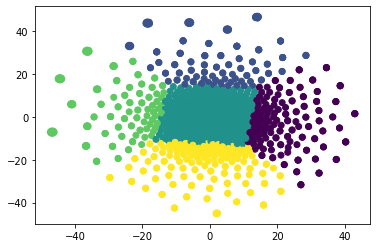

In [237]:
trainn = TSNE(2).fit_transform(dataset_tfidfV_input)
kmeans = KMeans(n_clusters=5, init='k-means++').fit(trainn)
XX=TSNE(2).fit_transform(dataset_tfidfV_input)
predictt=kmeans.fit_predict(XX)


label_ytrain_tfidf3 = col(predictt)
label_ytrain1_tfidf3 = col(dataset_tfidfV_target)


plt.scatter(XX[:,0], XX[:,1], c= label_ytrain1_tfidf3)
plt.show()
plt.scatter(XX[:,0], XX[:,1], c= label_ytrain_tfidf3)
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [238]:
dictionary3 = get_real_labels(label_ytrain_tfidf3, dataset_tfidfV_target, 5)
print(dictionary3)
numArray3 = []
for item in dataset_tfidfV_target:
    numArray3.append(dictionary3.get(item))


metrics(dataset_tfidfV_input, label_ytrain_tfidf3, numArray3)
silhouette_scores.append(metrics(dataset_tfidfV_input, label_ytrain_tfidf3, numArray3)[1])
kappa_scores.append(metrics(dataset_tfidfV_input, label_ytrain_tfidf3, numArray3)[0])
model_names.append('K-means with TFIDF and k = 5 and TSNE')
# plott(label_ytrain1,label_ytrain)

{'milton': 0, 'bible': 2, 'chesterton': 4, 'shakespeare': 3, 'melville': 1}
cohen_kappa score:  0.30374999999999996
homogeneity score:  0.29114756542520653
Silhouette score:  -0.0434928583877836
cohen_kappa score:  0.30374999999999996
homogeneity score:  0.29114756542520653
Silhouette score:  -0.0434928583877836
cohen_kappa score:  0.30374999999999996
homogeneity score:  0.29114756542520653
Silhouette score:  -0.0434928583877836


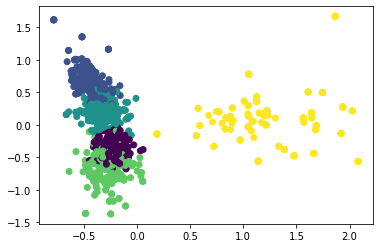

In [239]:
reduced_data = PCA(2).fit_transform(dataset_CV_bow_input)
label_ytrain = col(dataset_CV_bow_target)
plt.scatter(reduced_data[:,0], reduced_data[:,1], c= label_ytrain)
plt.show()

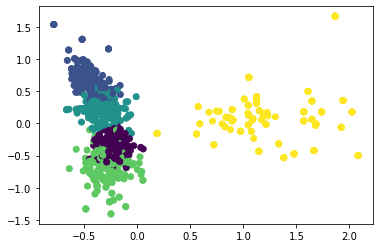

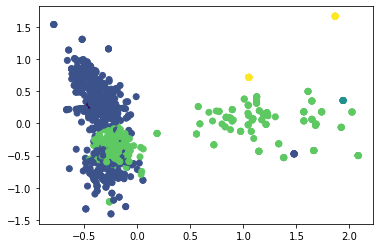

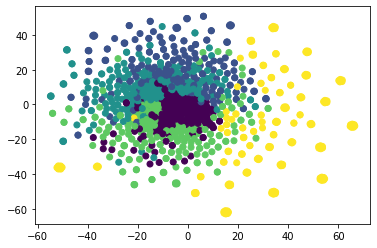

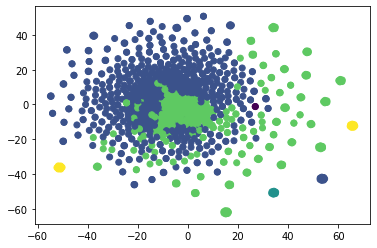

In [240]:
#cohen_kappa_score(pred_y, y_test_cv)
kmeans = KMeans(n_clusters=5, init='k-means++').fit(dataset_CV_bow_input)
pred_y = kmeans.fit_predict(dataset_CV_bow_input)
reduced_data = PCA(2).fit_transform(dataset_CV_bow_input)



label_ytrain_cv = col(pred_y)
label_ytrain1_cv = col(dataset_CV_bow_target)


plt.scatter(reduced_data[:,0], reduced_data[:,1], c= label_ytrain1_cv)
plt.show()
plt.scatter(reduced_data[:,0], reduced_data[:,1], c= label_ytrain_cv)
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

# t-SNE plot
embeddings = TSNE(2).fit_transform(dataset_CV_bow_input)
plt.scatter(embeddings[:,0], embeddings[:,1], c= label_ytrain1_cv)
plt.show()
plt.scatter(embeddings[:,0], embeddings[:,1], c= label_ytrain_cv)
plt.show()


In [241]:
dictionary4 = get_real_labels(label_ytrain_cv, dataset_CV_bow_target, 5)
print(dictionary4)
numArray4 = []
for item in dataset_CV_bow_target:
    numArray4.append(dictionary4.get(item))

metrics(dataset_CV_bow_input, label_ytrain_cv, numArray4)
silhouette_scores.append(metrics(dataset_CV_bow_input, label_ytrain_cv, numArray4)[1])
kappa_scores.append(metrics(dataset_CV_bow_input, label_ytrain_cv, numArray4)[0])
model_names.append('K-means with BOW and k = 5')
# plott(label_ytrain1,label_ytrain)

{'milton': 1, 'bible': 3, 'chesterton': 0, 'shakespeare': 4, 'melville': 2}
cohen_kappa score:  0.25625
homogeneity score:  0.7823988848172228
Silhouette score:  -0.03335041901222637
cohen_kappa score:  0.25625
homogeneity score:  0.7823988848172228
Silhouette score:  -0.03335041901222637
cohen_kappa score:  0.25625
homogeneity score:  0.7823988848172228
Silhouette score:  -0.03335041901222637


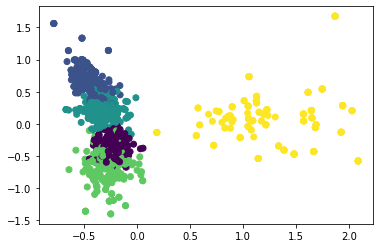

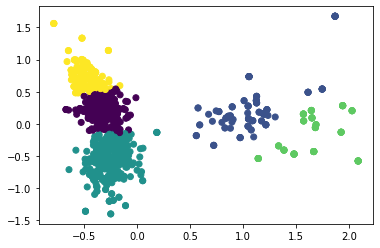

In [242]:
trainn = PCA(2).fit_transform(dataset_CV_bow_input)
kmeans = KMeans(n_clusters=5, init='k-means++').fit(trainn)
XX=PCA(2).fit_transform(dataset_CV_bow_input)
predictt=kmeans.fit_predict(XX)


label_ytrain_cv2 = col(predictt)
label_ytrain1_cv2 = col(dataset_CV_bow_target)


plt.scatter(XX[:,0], XX[:,1], c= label_ytrain1_cv2)
plt.show()
plt.scatter(XX[:,0], XX[:,1], c= label_ytrain_cv2)
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [243]:
dictionary5 = get_real_labels(label_ytrain_cv2, dataset_CV_bow_target, 5)
print(dictionary5)
numArray5 = []
for item in dataset_CV_bow_target:
    numArray5.append(dictionary5.get(item))

metrics(dataset_CV_bow_input, label_ytrain_cv2, numArray5)
silhouette_scores.append(metrics(dataset_CV_bow_input, label_ytrain_cv2, numArray5)[1])
kappa_scores.append(metrics(dataset_CV_bow_input, label_ytrain_cv2, numArray5)[0])
model_names.append('K-means with BOW and k = 5 and PCA')
# plott(label_ytrain1,label_ytrain)

{'milton': 2, 'bible': 0, 'chesterton': 4, 'shakespeare': 1, 'melville': 3}
cohen_kappa score:  0.37
homogeneity score:  0.7601601468903282
Silhouette score:  -0.03335041901222637
cohen_kappa score:  0.37
homogeneity score:  0.7601601468903282
Silhouette score:  -0.03335041901222637
cohen_kappa score:  0.37
homogeneity score:  0.7601601468903282
Silhouette score:  -0.03335041901222637


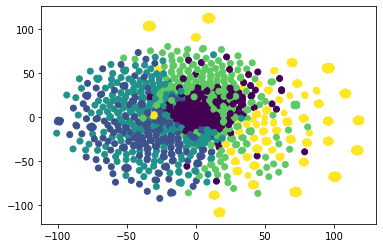

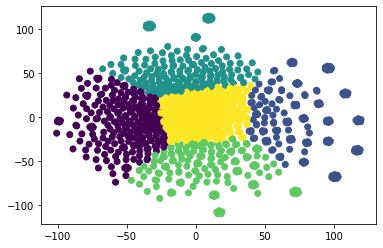

In [244]:
trainn = TSNE(2).fit_transform(dataset_CV_bow_input)
kmeans = KMeans(n_clusters=5, init='k-means++').fit(trainn)
XX=TSNE(2).fit_transform(dataset_CV_bow_input)
predictt=kmeans.fit_predict(XX)


label_ytrain_cv3 = col(predictt)
label_ytrain1_cv3 = col(dataset_CV_bow_target)


plt.scatter(XX[:,0], XX[:,1], c= label_ytrain1_cv3)
plt.show()
plt.scatter(XX[:,0], XX[:,1], c= label_ytrain_cv3)
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [245]:
dictionary6 = get_real_labels(label_ytrain_cv2, dataset_CV_bow_target, 5)
print(dictionary6)
numArray6 = []
for item in dataset_CV_bow_target:
    numArray6.append(dictionary6.get(item))


metrics(dataset_CV_bow_input, label_ytrain_cv3, numArray6)
silhouette_scores.append(metrics(dataset_CV_bow_input, label_ytrain_cv3, numArray6)[1])
kappa_scores.append(metrics(dataset_CV_bow_input, label_ytrain_cv3, numArray6)[0])
model_names.append('K-means with BOW and k = 5 and TSNE')
# plott(label_ytrain1,label_ytrain)

{'milton': 2, 'bible': 0, 'chesterton': 4, 'shakespeare': 1, 'melville': 3}
cohen_kappa score:  0.08750000000000002
homogeneity score:  0.33606581932732327
Silhouette score:  -0.03335041901222637
cohen_kappa score:  0.08750000000000002
homogeneity score:  0.33606581932732327
Silhouette score:  -0.03335041901222637
cohen_kappa score:  0.08750000000000002
homogeneity score:  0.33606581932732327
Silhouette score:  -0.03335041901222637


# Expectation Maximization

In [246]:
def Author_to_num (data):
  uni_data = data.unique()
  data_dictionary = dict()
  num = 0
  for name in uni_data:
    data_dictionary[name] = num
    num += 1
  
  numArray = []
  for item in data:
    numArray.append(data_dictionary.get(item))
  return numArray

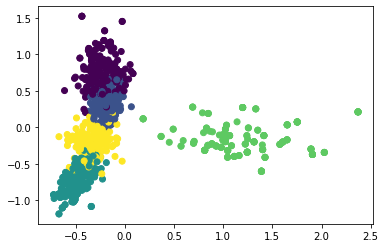

In [247]:
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

# reduce the features to 2D
pca = PCA(n_components=2, random_state=42)
reduced_features = pca.fit_transform(dataset_tfidfV_input)

plt.scatter(reduced_features[:,0], reduced_features[:,1], c=Author_to_num(dataset_tfidfV_target))


In [248]:
# distortions = []
# K = range(1,10)
# for k in K:
#     GMM = GaussianMixture(n_components= k, init_params= 'random', random_state= 42,covariance_type= 'spherical').fit(dataset_CV_bow_input)
#     distortions.append(GMM.aic(dataset_CV_bow_input))

# plt.figure(figsize=(16,8))
# plt.plot(K, distortions, 'bx-')
# plt.xlabel('k')
# plt.ylabel('AIC')
# plt.title('The Elbow Method showing the optimal k')
# plt.show()

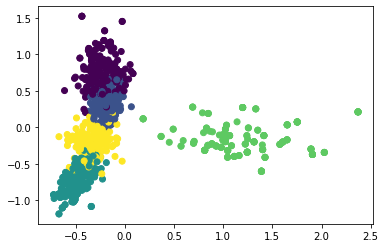

In [249]:
# reduce the features to 2D
pca = PCA(n_components=2, random_state=42)
reduced_features = pca.fit_transform(dataset_tfidfV_input)

plt.scatter(reduced_features[:,0], reduced_features[:,1], c=Author_to_num(dataset_tfidfV_target))


In [250]:
clf = GaussianMixture(n_components= 5, init_params= 'random', random_state= 42,covariance_type= 'spherical').fit(dataset_tfidfV_input)

In [251]:
predicted1 = clf.predict(dataset_tfidfV_input)

# Forming a Cross tabular of the true labels and the predicted ones
df = pd.DataFrame({'labels': predicted1, 'Authors': dataset_tfidfV_target})
ct = pd.crosstab(df['labels'], df['Authors'])
print(ct)

Authors  bible  chesterton  melville  milton  shakespeare
labels                                                   
0            2           0        44     179           16
1            0           0         0       0          104
2            0         156        28       0           20
3          173           0         6       0            3
4           25          44       122      21           57


In [252]:
dictionary = get_real_labels(predicted1, dataset_tfidfV_target, 5)
print(dictionary)
numArray = []
for item in dataset_tfidfV_target:
    numArray.append(dictionary.get(item))

wrong_ones = []
for i in range(0,len(predicted1)):
  if predicted1[i] != numArray[i]:
    wrong_ones.append(i)

k12 = cohen_kappa_score(numArray, predicted1)
s12 = silhouette_score(dataset_tfidfV_input, predicted1)

silhouette_scores.append(s12)
kappa_scores.append(k12)
model_names.append('EM with TFIDF and 5 cluster')

print(len(wrong_ones))
print("The kappa value is {}".format(k12))
print("The Silhouttee value is {}".format(s12))

{'milton': 0, 'bible': 3, 'chesterton': 2, 'shakespeare': 1, 'melville': 4}
266
The kappa value is 0.6675
The Silhouttee value is -0.061833617620435544


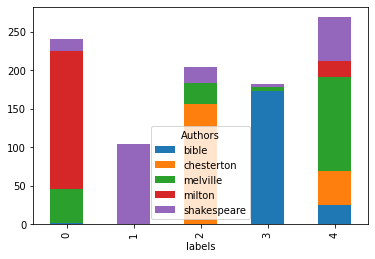

In [253]:
# Cross tabulation plotting
ct.plot.bar(stacked=True)
plt.show()

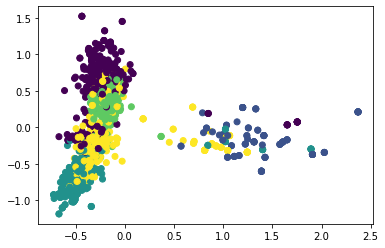

In [254]:
# plotting the predicted clusters
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=predicted1)

In [255]:
# distortions = []
# K = range(1,10)
# for k in K:
#     GMM = GaussianMixture(n_components= k, init_params= 'random', random_state= 42,covariance_type= 'spherical').fit(dataset_CV_bow_input)
#     distortions.append(GMM.aic(dataset_CV_bow_input))

# plt.figure(figsize=(16,8))
# plt.plot(K, distortions, 'bx-')
# plt.xlabel('k')
# plt.ylabel('AIC')
# plt.title('The Elbow Method showing the optimal k')
# plt.show()

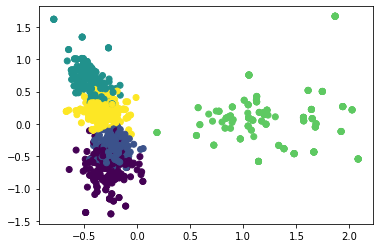

In [256]:
# plotting the data with the count-vectorier modification
pca = PCA(n_components=2, random_state=42)
reduced_features = pca.fit_transform(dataset_CV_bow_input)

plt.scatter(reduced_features[:,0], reduced_features[:,1], c=Author_to_num(dataset_CV_bow_target))

In [257]:
# Training the data
clf2 = GaussianMixture(n_components= 5, init_params= 'random', random_state= 42,covariance_type= 'spherical').fit(dataset_CV_bow_input)

In [258]:
predicted = clf2.predict(dataset_CV_bow_input)
# Forming a Cross tabular of the true labels and the predicted ones
df = pd.DataFrame({'labels': predicted, 'Authors': dataset_CV_bow_target})
ct2 = pd.crosstab(df['labels'], df['Authors'])
print(ct2)

Authors  bible  chesterton  melville  milton  shakespeare
labels                                                   
0            0          36        23     169           31
1            0           3         0       0           42
2            0           0         0       0          112
3          188           1        10       1            0
4           12         160       167      30           15


In [259]:
dictionary = get_real_labels(predicted, dataset_CV_bow_target, 5)
numArray = []
for item in dataset_CV_bow_target:
    numArray.append(dictionary.get(item))

wrong_ones = []
for i in range(0,len(predicted)):
  if predicted[i] != numArray[i]:
    wrong_ones.append(i)

k11 = cohen_kappa_score(numArray, predicted)
s11 = silhouette_score(dataset_CV_bow_input, predicted)

silhouette_scores.append(s11)
kappa_scores.append(k11)
model_names.append('EM with BOW and 5 cluster')

print(len(wrong_ones))
print(wrong_ones)
print("The kappa value is {}".format(k11))
print("The Silhouttee value is {}".format(s11))

371
[2, 11, 12, 18, 19, 25, 26, 29, 32, 33, 34, 35, 38, 43, 45, 49, 52, 53, 59, 61, 62, 64, 65, 66, 67, 74, 76, 80, 82, 83, 85, 86, 92, 96, 97, 98, 105, 109, 110, 111, 115, 116, 117, 119, 122, 124, 132, 137, 138, 142, 146, 152, 153, 160, 161, 164, 165, 166, 170, 172, 175, 176, 179, 181, 184, 186, 189, 190, 194, 199, 204, 205, 206, 207, 208, 209, 212, 214, 218, 219, 220, 221, 228, 230, 232, 237, 240, 242, 246, 248, 250, 254, 255, 258, 264, 269, 270, 273, 274, 276, 279, 280, 281, 282, 284, 285, 288, 289, 292, 295, 302, 305, 306, 308, 310, 314, 316, 320, 321, 324, 326, 328, 334, 351, 352, 355, 356, 359, 362, 363, 367, 369, 374, 379, 380, 384, 388, 389, 394, 395, 399, 402, 410, 412, 413, 415, 417, 418, 423, 431, 432, 441, 443, 445, 447, 448, 451, 454, 455, 459, 460, 462, 464, 467, 469, 470, 474, 477, 479, 481, 483, 485, 488, 490, 492, 495, 496, 501, 503, 506, 511, 515, 517, 518, 520, 522, 523, 529, 530, 534, 535, 538, 540, 542, 546, 547, 548, 549, 553, 557, 558, 560, 561, 562, 563, 566, 56

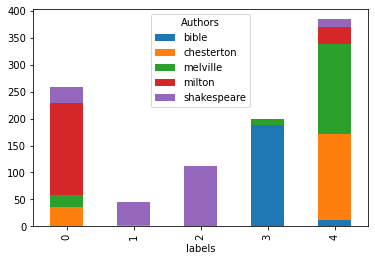

In [260]:
# Cross tabulation plotting
ct2.plot.bar(stacked=True)
plt.show()

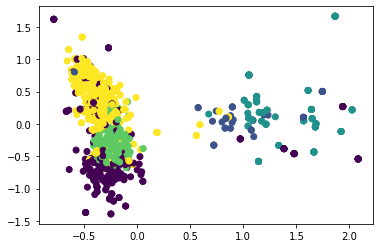

In [261]:
# plotting the predicted clusters
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=predicted)

# Heirarcial Clustering

In [262]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import homogeneity_score, silhouette_score
from sklearn.metrics import cohen_kappa_score

import seaborn as sns


In [263]:
#bible, melville, milton, chesterton, shakespeare
np.unique(dataset_tfidfV_target, return_counts=True)

(array(['bible', 'chesterton', 'melville', 'milton', 'shakespeare'],
       dtype=object), array([200, 200, 200, 200, 200]))

In [264]:
#tfidfV
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(dataset_tfidfV_input)
len(reduced_features)

def preprocess(y):
  label_y = np.array(y)
  le = preprocessing.LabelEncoder()
  le.fit(label_y)
  label_y = le.transform(label_y)
  return label_y


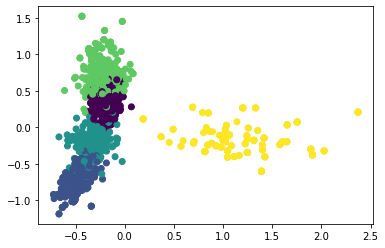

In [265]:
label_y = preprocess(dataset_tfidfV_target)
plt.scatter(reduced_features[:,0], reduced_features[:,1], c= label_y)

Text(0, 0.5, 'Distance')

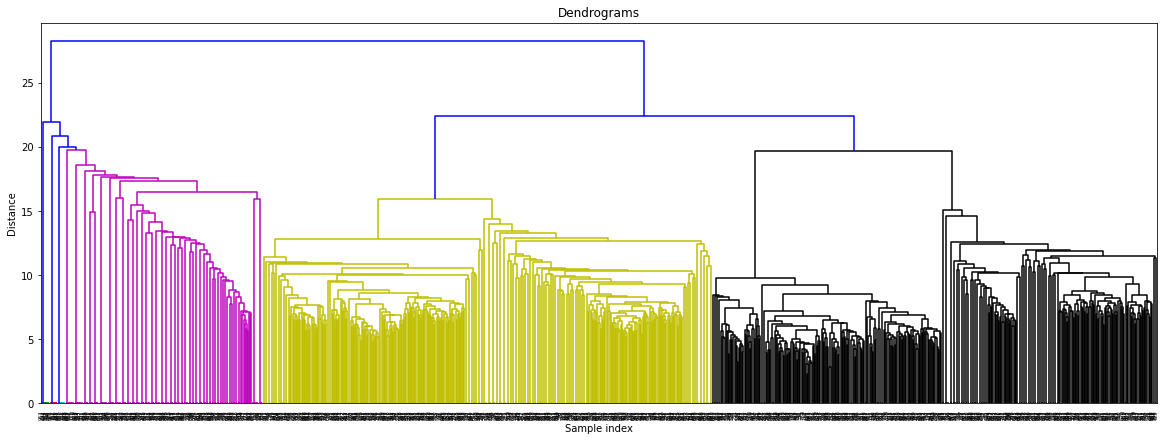

In [266]:
# create dendrogram
plt.figure(figsize=(20, 7))  
plt.title("Dendrograms")  
dendrogram = sch.dendrogram(sch.linkage(dataset_tfidfV_input, method='ward'))
plt.xlabel('Sample index')
plt.ylabel('Distance')

In [267]:
def evaluate_model(dataset, label_y, y):
  h = homogeneity_score(label_y, y)
  s = silhouette_score(dataset, y)
  k = cohen_kappa_score(label_y, y)
  print('homogeneity_score', h)
  print('silhouette_score', s)
  print('cohen_kappa_score', k)
  #print('accuracy_score', accuracy_score(label_y, y))
  
  # print('completeness_score', completeness_score(label_y, y))
  # print('v_measure_score', v_measure_score(label_y, y))
  # print('adjusted_rand_score', adjusted_rand_score(label_y, y))
  # print('adjusted_mutual_info_score', adjusted_mutual_info_score(label_y, y))

  return k, s


In [268]:
def train_AgglomerativeClustering(x, y, distance, linkage):
  hc = AgglomerativeClustering(n_clusters= 5, affinity = distance, linkage = linkage)
  y_hc = hc.fit_predict(x)
  #print(y_hc)
  # label_y = preprocess(y)
  dictionary = get_real_labels(y_hc, y, 5)
  print(dictionary)
  numArray = []
  for item in y:
    numArray.append(dictionary.get(item))

  cohen_kappa_score1, silhouette_score1 = evaluate_model(x, numArray, y_hc)
  # plt.scatter(reduced_features[:,0], reduced_features[:,1], c= y_hc, cmap='viridis')
  # plt.show()
  sns.scatterplot(reduced_features[:,0], reduced_features[:,1], hue= y_hc, palette= 'tab10')

  return cohen_kappa_score1, silhouette_score1

{'milton': 1, 'bible': 2, 'chesterton': 0, 'shakespeare': 3, 'melville': 4}
homogeneity_score 0.6044286772218541
silhouette_score 0.026875126436395513
cohen_kappa_score 0.003750000000000031


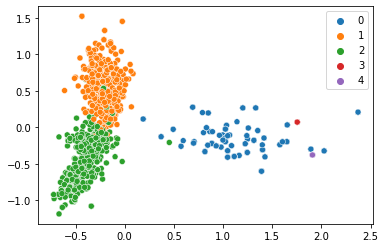

In [269]:
# create clusters with euclidean distance and linkage ward
cohen_kappa_score1, silhouette_score1 = train_AgglomerativeClustering(dataset_tfidfV_input, dataset_tfidfV_target, 'euclidean', 'ward')
silhouette_scores.append(silhouette_score1)
kappa_scores.append(cohen_kappa_score1)
model_names.append("HC 5 clusters TFIDF")

{'milton': 4, 'bible': 3, 'chesterton': 0, 'shakespeare': 1, 'melville': 2}
homogeneity_score 0.6056077322761259
silhouette_score 0.023498537446512445
cohen_kappa_score 0.21374999999999988


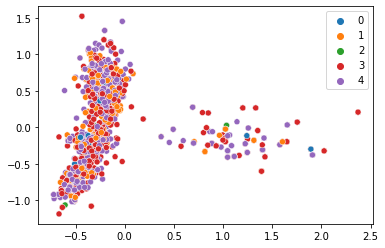

In [270]:
#cv
cohen_kappa_score2, silhouette_score2 = train_AgglomerativeClustering(dataset_CV_bow_input, dataset_CV_bow_target, 'euclidean', 'ward')
silhouette_scores.append(silhouette_score2)
kappa_scores.append(cohen_kappa_score2)
model_names.append("HC\n5 clusters\nBOW")

# Choosing the Champion model

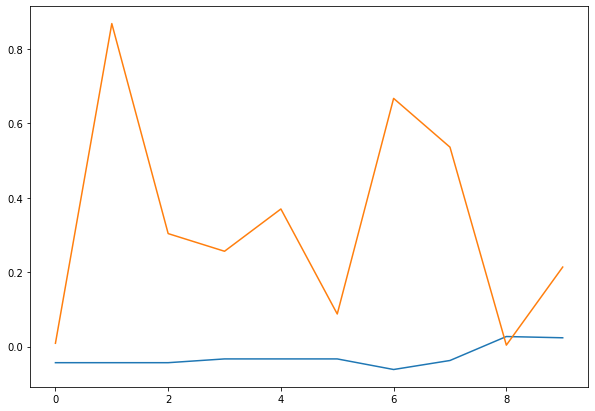

In [271]:
# we can plot the values of silhouette and kappa score againt the models
plt.figure(figsize=(10, 7)) 
x = list(range(len(model_names)))
plt.plot(x, silhouette_scores)
plt.plot(x, kappa_scores)

plt.show()

In [272]:
print('highest kappa and highest silhouette are with the model: ', model_names[1])
print('silhouette score: ', silhouette_scores[1])
print('Kappa score: ', kappa_scores[1])

highest kappa and highest silhouette are with the model:  K-means with TFIDF and k = 5 and PCA
silhouette score:  -0.0434928583877836
Kappa score:  0.86875


# Extracitng the top 10 words from wrongly classified data

In [273]:
# getting wrongly classified data from the champion model

wrong_ones = pd.DataFrame(columns=['index_wrong', "false_cluster"])
for i in range(0,len(label_ytrain_tfidf2)):
  if predicted[i] != numArray2[i]:
    new_row = {'index_wrong': i, 'false_cluster': label_ytrain_tfidf2[i]}
    wrong_ones = wrong_ones.append(new_row, ignore_index= True)


In [274]:
# Forming a Cross tabular of the true labels and the predicted ones
df = pd.DataFrame({'labels': label_ytrain_tfidf2, 'Authors': dataset_tfidfV_target})
ct22 = pd.crosstab(df['labels'], df['Authors'])
print(ct22)

Authors  bible  chesterton  melville  milton  shakespeare
labels                                                   
0            2          31       181       0            0
1            0           0         0       0          190
2           14           0         0     171            0
3          184           0        10      29           10
4            0         169         9       0            0


<Figure size 1080x720 with 0 Axes>

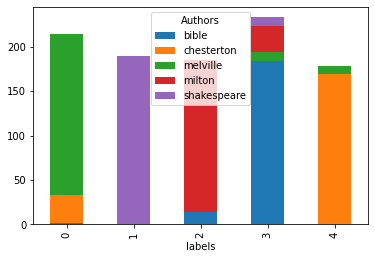

In [275]:
# Cross tabulation plotting
plt.figure(figsize=(15, 10)) 
ct22.plot.bar(stacked=True)
plt.show()

In [276]:
corpus = dataFrameT["partition"]
for i in wrong_ones['false_cluster'].unique():
  sub_data = wrong_ones[wrong_ones['false_cluster'] == i]
  data = []
  for j in sub_data['index_wrong']:
    data.append(corpus[j])
  data = pd.Series(data)
  lst_tokens = nltk.tokenize.word_tokenize(data.str.cat(sep=" "))
    
  ## unigrams
  dic_words_freq = nltk.FreqDist(lst_tokens)
  dtf_uni = pd.DataFrame(dic_words_freq.most_common(10), 
                       columns=["Word","Freq"])
  dtf_uni.set_index("Word").iloc[:top,:].sort_values(by="Freq")

  print('Most frequent words in cluster {}'.format(i))
  print(dtf_uni)


Most frequent words in cluster 3
    Word  Freq
0  shall   240
1   thou   212
2    one   201
3    man   187
4   lord   168
5    thi   156
6   said   151
7   like   147
8   unto   138
9   thee   135
Most frequent words in cluster 1
    Word  Freq
0  shall   242
1   thou   184
2    one   159
3    man   158
4    thi   151
5    god   147
6   lord   142
7     ye   140
8   like   138
9   said   111
Most frequent words in cluster 0
    Word  Freq
0  shall   260
1   thou   161
2   lord   158
3    thi   153
4    man   149
5    one   137
6   said   133
7    god   123
8   thee   116
9   like   114
Most frequent words in cluster 4
    Word  Freq
0  shall   157
1    one   120
2    man   117
3   thou   117
4   unto   112
5    son   108
6   said   103
7    thi    99
8   like    82
9   lord    75
Most frequent words in cluster 2
    Word  Freq
0  shall   197
1    one   155
2    man   138
3   thou   137
4    god   124
5   said   122
6   king   112
7     ye   109
8   like   106
9    thi   101


# Comparing some documents with doc2vec


In [304]:
from scipy import spatial

dict_dist = {}
list_row = []
counter = 0

# bible and moby dick

for i in range(30):
  for j in range(900,930):
    vec1 = doc2vec_model.infer_vector(tokenized_data[i])
    vec2 = doc2vec_model.infer_vector(tokenized_data[j])
    spatial1 = spatial.distance.cosine(vec1, vec2)
    if spatial1 > 0.7:
      counter = counter + 1
    list_row.append(spatial1)
  dict_dist[i] = list_row
  list_row = []

dataframe_doc2vec = pd.DataFrame(data = dict_dist)

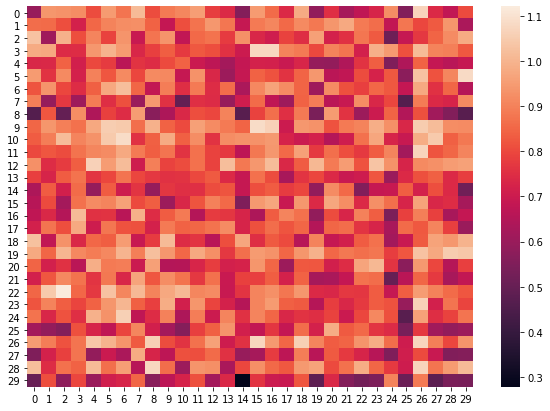

In [305]:
plt.figure(figsize=(10, 7)) 
sns.heatmap(dataframe_doc2vec)


In [307]:
print("number of values above 0.5 in similarity score: ", counter)

number of values above 0.5 in similarity score:  725


In [302]:
dict_dist2 = {}
list_row2 = []
counter2 = 0

# bible and brown

for i in range(30):
  for j in range(500,530):
    vec1 = doc2vec_model.infer_vector(tokenized_data[i])
    vec2 = doc2vec_model.infer_vector(tokenized_data[j])
    spatial2 = spatial.distance.cosine(vec1, vec2)
    if spatial2 > 0.7:
      counter2 = counter2 + 1
    list_row2.append(spatial2)
  dict_dist2[i] = list_row2
  list_row2 = []

dataframe_doc2vec2 = pd.DataFrame(data = dict_dist2)

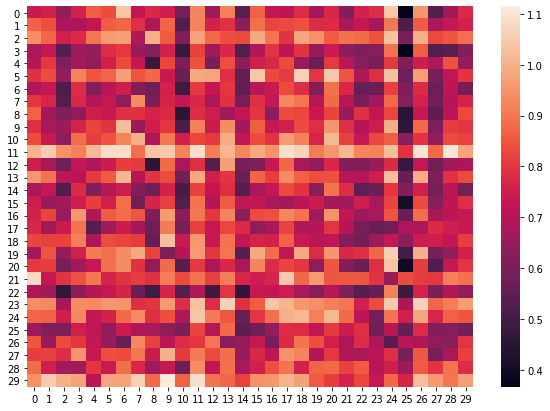

In [303]:
plt.figure(figsize=(10, 7)) 
sns.heatmap(dataframe_doc2vec2)

In [306]:
print("number of values above 0.5 in similarity score: ", counter2)

number of values above 0.5 in similarity score:  636
